<button data-commandLinker-command="progressivis:cleanup_and_run" data-commandlinker-args='{"index": 1}' href="#">Run ProgressiVis</button>

In [1]:
from ipyprogressivis.widgets import get_header, Constructor
from ipyprogressivis.widgets.chaining.utils import create_root
from ipyprogressivis.widgets.chaining.custom import *
import panel as pn 
header = get_header()
display(header.talker)
display(header.backup)
pn.extension('ace', 'jsoneditor', 'ipywidgets')
_ = header.constructor
with header.modules_out:
    display(header.board)
with header.widgets_out:
    display(header.manager)
header.talker.labcommand("notebook:hide-cell-code")
%reload_ext ipyprogressivis.magics
create_root(header.backup)

In [3]:
# progressivis-snippet
from progressivis.stats.blobs_table import BlobsPTable
from progressivis.core.api import Sink

@register_snippet
def blobs_table(input_module, input_slot, columns):
    n_samples = 100_000_000
    n_components = 2
    rtol = 0.01
    centers = [(0.1, 0.3, 0.5), (0.7, 0.5, 3.3), (-0.4, -0.3, -11.1)]
    scheduler = input_module.scheduler()
    with scheduler:
        data = BlobsPTable(columns=['_0', '_1', '_2'],  centers=centers,
                           cluster_std=0.2, rows=n_samples, scheduler=scheduler)
        sink = Sink(scheduler=scheduler)
        sink.input.inp = data.output.result
    return SnippetResult(output_module=data, output_slot="result")

## root

In [2]:
# do not run this cell
display(header.constructor)
header.constructor.start_scheduler()
header.talker.labcommand('notebook:hide-cell-code')

Constructor(children=(IntProgress(value=0, description='Starting ProgressiVis ...', max=2, style=ProgressStyle…

Starting scheduler
# Scheduler added module(s): ['sink_1', 'variable_1']


## Blobs

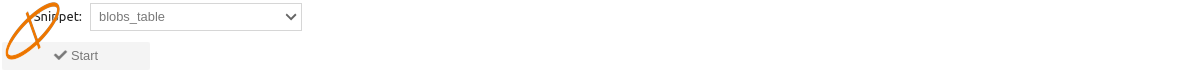

In [4]:
Constructor.widget('Blobs', 0)

In [5]:
# progressivis-snippet
import ipywidgets as widgets
import numpy as np
import progressivis.core.aio as aio
from typing import Any as AnyType
from progressivis.table.range_query_2d import RangeQuery2d


def make_slider(desc):
    return widgets.FloatRangeSlider(
        value=[-1000, 1000],
        min=-1000.,
        max=1000.,
        step=0.1,
        description=desc,
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
)

def make_observer(col_x, col_y, range_qry, slider_x, slider_y):
    def _observe_range(val: AnyType) -> None:
        async def _coro(v: AnyType) -> None:
            min_x, max_x = slider_x.value
            min_y, max_y = slider_y.value
            await range_qry.dep.min_value.from_input({col_x: min_x, col_y: min_y})
            await range_qry.dep.max_value.from_input({col_x: max_x, col_y: max_y})
        aio.create_task(_coro(val))

    return _observe_range

class AfterRun:
    def __init__(self, column_x, column_y, slider_x, slider_y, period=3):
        self._cnt = 0
        self._t = period
        self._column_x = column_x
        self._column_y = column_y
        self._slider_x = slider_x
        self._slider_y = slider_y

    async def __call__(self, m, r):
        if self._cnt % self._t:
            self._cnt += 1
            return
        x = self._column_x
        y = self._column_y
        slid_x = self._slider_x
        slid_y = self._slider_y
        if not (m.dep.index.min_out and
                m.dep.index.max_out):
            return
        slid_x.min = m.dep.index.min_out[x]
        slid_x.max = m.dep.index.max_out[x]
        slid_y.min = m.dep.index.min_out[y]
        slid_y.max = m.dep.index.max_out[y]
        self._cnt += 1

@register_snippet
def range_query_2d_with_slider(input_module, input_slot, columns):
    scheduler = input_module.scheduler()
    with scheduler:
        column_x, column_y = columns["x"], columns["y"]
        min_ = {column_x: -np.inf, column_y: -np.inf}
        max_ = {column_x: np.inf, column_y: np.inf}
        range_qry = RangeQuery2d(column_x=column_x, column_y=column_y, scheduler=scheduler)
        range_qry.create_dependent_modules(input_module, input_slot)
        range_qry.dep.min_value.result.update(min_)
        range_qry.dep.max_value.result.update(max_)
        range_slider_x = make_slider("X")
        range_slider_y = make_slider("Y")
        range_qry.on_after_run(AfterRun(column_x, column_y, range_slider_x, range_slider_y))
        sink = Sink(scheduler=scheduler)
        sink.input.inp = range_qry.output.result
    observer = make_observer(column_x, column_y, range_qry, range_slider_x, range_slider_y)
    range_slider_x.observe(observer, "value")
    range_slider_y.observe(observer, "value")
    return SnippetResult(output_module=range_qry,
                         output_slot="result",
                         widget=widgets.VBox([range_slider_x, range_slider_y])
                         )

## Snippet

# Scheduler added module(s): ['data_shape_1', 'sink_3']
# Scheduler deleted module(s): {'sink_3', 'data_shape_1'}


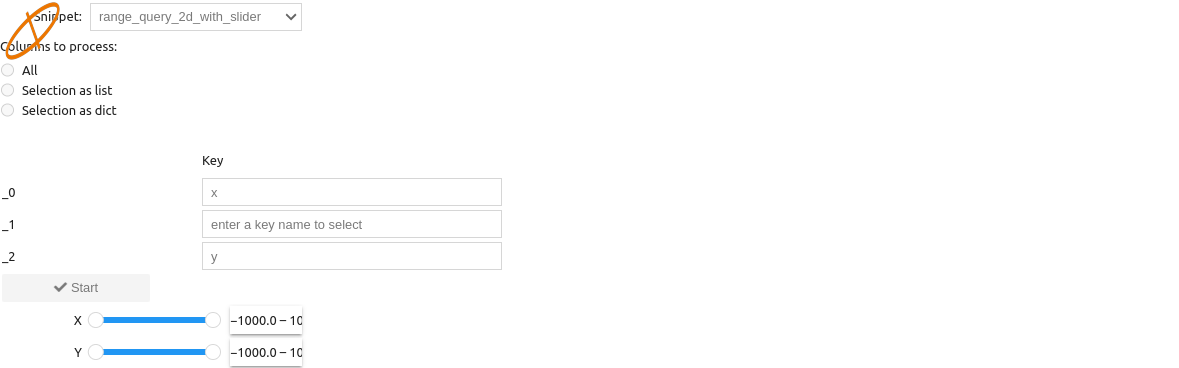

In [6]:
Constructor.widget('Snippet', 0)

## Heatmap

# Scheduler added module(s): ['data_shape_1', 'sink_4']


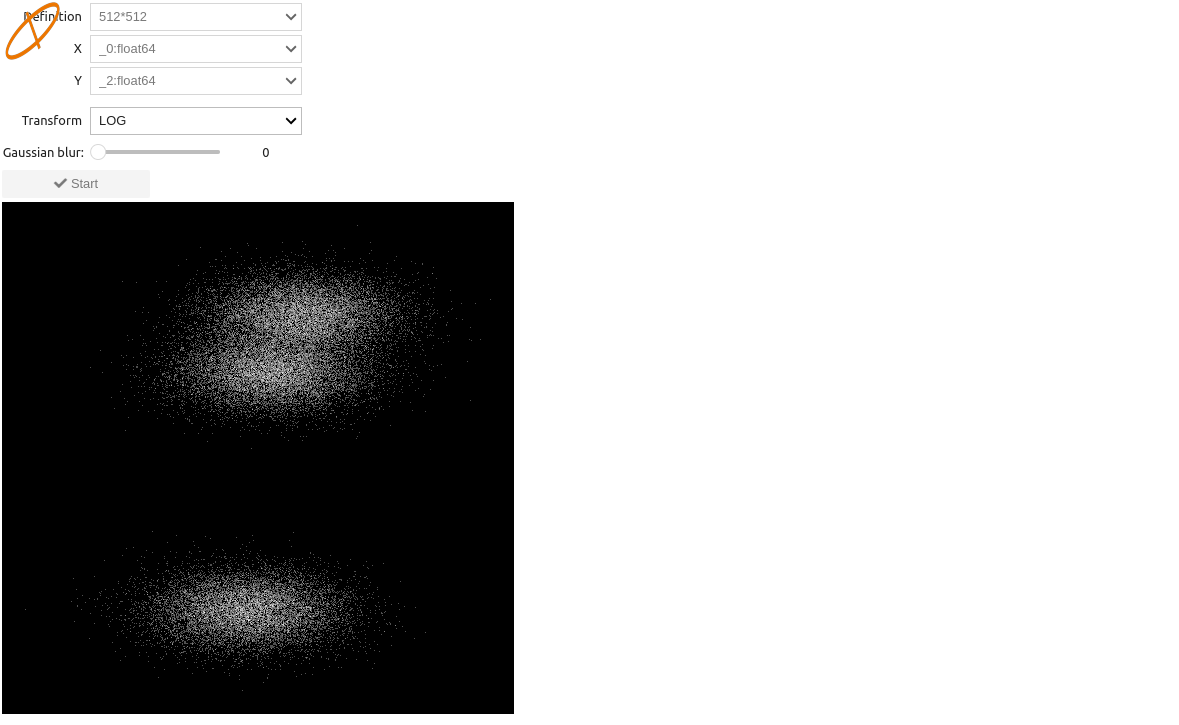

# Scheduler deleted module(s): {'sink_4', 'data_shape_1'}


In [7]:
Constructor.widget('Heatmap', 0)